In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
!pip install xgboost

Dados: IoT_Intrusion.csv(197.51 MB) from:

https://www.kaggle.com/code/jorgeagualimpia/seguridad-informatica-iot/input

About Dataset

The dataset has been introduced by the below-mentioned researches: E. C. P. Neto, S. Dadkhah, R. Ferreira, A. Zohourian, R. Lu, A. A. Ghorbani. "CICIoT2023: A real-time dataset and benchmark for large-scale attacks in IoT environment," Sensor (2023) – (submitted to Journal of Sensors). The present data contains different kinds of IoT intrusions. The categories of the IoT intrusions enlisted in the data are as follows: DDoS Brute Force Spoofing DoS Recon Web-based Mirai

In [3]:
df = pd.read_csv("/home/nail/Documents/Natalia/IoT/Datas/CIC_IOT_Dataset2023/IoT_Intrusion/IoT_Intrusion.csv")



FileNotFoundError: [Errno 2] No such file or directory: '/home/nail/Documents/Natalia/IoT/Datas/CIC_IOT_Dataset2023/IoT_Intrusion/IoT_Intrusion.csv'

ML models for dataset:
1. LinearRegression
2. LogisticRegression
3. RandomForestClassifier
4. Decision Trees
5. KNeighborsClassifier
6. GradientBoostingClassifier
7. XGBoost
8. Naive Bayes
9. Multi-Layer Perceptron
10. Support Vector Machine - didn't work out


In [ ]:
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1,0,1,...,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0,0,0,...,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0,0,0,...,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0,0,0,...,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0,1,0,...,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1.391925,108.00,6.00,64.00,1.437685,1.437685,0.0,0,1,0,...,0.000000,54.00,8.336550e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
1048571,0.000000,2.14,46.70,65.91,0.000000,0.000000,0.0,0,0,0,...,5.281048,588.22,8.367732e+07,9.5,34.370618,7.497140,469.190222,0.06,141.55,Mirai-greeth_flood
1048572,0.132971,30847.00,17.00,64.00,5978.034950,5978.034950,0.0,0,0,0,...,0.000000,50.00,8.312373e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
1048573,0.000000,54.00,6.00,64.00,25.672981,25.672981,0.0,1,0,1,...,0.000000,54.00,8.334509e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 47 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   flow_duration    1048575 non-null  float64
 1   Header_Length    1048575 non-null  float64
 2   Protocol Type    1048575 non-null  float64
 3   Duration         1048575 non-null  float64
 4   Rate             1048575 non-null  float64
 5   Srate            1048575 non-null  float64
 6   Drate            1048575 non-null  float64
 7   fin_flag_number  1048575 non-null  int64  
 8   syn_flag_number  1048575 non-null  int64  
 9   rst_flag_number  1048575 non-null  int64  
 10  psh_flag_number  1048575 non-null  int64  
 11  ack_flag_number  1048575 non-null  int64  
 12  ece_flag_number  1048575 non-null  int64  
 13  cwr_flag_number  1048575 non-null  int64  
 14  ack_count        1048575 non-null  float64
 15  syn_count        1048575 non-null  float64
 16  fin_count        1

In [ ]:
df2 = df[df['label'].isin(['BenignTraffic','DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood',  'DoS-TCP_Flood','DoS-UDP_Flood','DDoS-RST'])]

In [ ]:
df2

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0,0,0,...,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0,0,0,...,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
8,0.002135,192.52,16.89,65.73,16.883240,16.883240,0.0,0,0,0,...,7.624944,180.72,8.300732e+07,9.5,18.809396,10.792987,328.325187,0.19,141.55,DoS-UDP_Flood
13,6.745006,108.00,6.00,64.00,0.296516,0.296516,0.0,0,0,0,...,0.000000,54.00,8.294343e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-TCP_Flood
15,0.019979,58.56,6.11,64.64,1.627960,1.627960,0.0,0,0,0,...,6.330105,55.16,8.294343e+07,9.5,10.609660,8.960901,236.009885,0.18,141.55,DoS-TCP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048554,8.125429,708306.30,6.00,215.20,251.191812,251.191812,0.0,0,0,0,...,0.261534,64.80,1.665230e+08,13.5,11.489125,0.000000,0.000000,0.00,244.60,BenignTraffic
1048556,4.296151,108.24,6.00,63.83,0.616042,0.616042,0.0,0,0,0,...,0.167652,54.12,8.294724e+07,9.5,10.396320,0.238004,0.472855,0.06,141.55,DoS-TCP_Flood
1048562,0.033388,22767.95,16.78,64.00,14676.047690,14676.047690,0.0,0,0,0,...,3.222176,52.83,8.301656e+07,9.5,10.110226,4.576879,152.061590,0.19,141.55,DoS-UDP_Flood
1048568,0.000000,54.00,6.00,64.00,213.626887,213.626887,0.0,0,0,0,...,0.000000,54.00,8.294288e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-TCP_Flood


In [ ]:
X = df[df.columns[0:-1]].fillna(0).reset_index(drop=True)
y = df['label']== 'BenignTraffic'

In [ ]:
X

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1,0,1,...,54.000000,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0,0,0,...,54.796404,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0,0,0,...,42.000000,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0,0,0,...,50.000000,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0,1,0,...,67.959230,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1.391925,108.00,6.00,64.00,1.437685,1.437685,0.0,0,1,0,...,54.000000,0.000000,54.00,8.336550e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55
1048571,0.000000,2.14,46.70,65.91,0.000000,0.000000,0.0,0,0,0,...,590.691450,5.281048,588.22,8.367732e+07,9.5,34.370618,7.497140,469.190222,0.06,141.55
1048572,0.132971,30847.00,17.00,64.00,5978.034950,5978.034950,0.0,0,0,0,...,50.000000,0.000000,50.00,8.312373e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55
1048573,0.000000,54.00,6.00,64.00,25.672981,25.672981,0.0,1,0,1,...,54.000000,0.000000,54.00,8.334509e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55


In [ ]:
y

,label
0,False
1,False
2,False
3,False
4,False
...,...
1048570,False
1048571,False
1048572,False
1048573,False


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.33, random_state=42)

In [ ]:
X_train

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
664918,0.000000,0.0,1.0,64.00,8.375934,8.375934,0.0,0,0,0,...,42.000000,0.000000,42.0,8.312463e+07,9.5,9.165151,0.000000,0.000,0.0,141.55
741964,7.544084,3144671.8,6.0,132.20,224.229466,224.229466,0.0,0,0,0,...,692.430635,944.780928,407.2,4.108500e-03,5.5,35.467986,1336.122002,1017760.502,0.9,38.50
314050,0.000000,0.0,1.0,64.00,54.630038,54.630038,0.0,0,0,0,...,42.000000,0.000000,42.0,8.315026e+07,9.5,9.165151,0.000000,0.000,0.0,141.55
631759,0.000000,81.0,6.0,64.00,12.142679,12.142679,0.0,0,0,0,...,54.000000,0.000000,54.0,8.292581e+07,9.5,10.392305,0.000000,0.000,0.0,141.55
555223,0.000000,0.0,1.0,64.00,20.161676,20.161676,0.0,0,0,0,...,42.000000,0.000000,42.0,8.314970e+07,9.5,9.165151,0.000000,0.000,0.0,141.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0.000000,54.0,6.0,64.00,3.609968,3.609968,0.0,1,0,1,...,54.000000,0.000000,54.0,8.334383e+07,9.5,10.392305,0.000000,0.000,0.0,141.55
365838,0.000000,54.0,6.0,65.91,79.969951,79.969951,0.0,0,0,0,...,54.000000,0.000000,54.0,8.333173e+07,9.5,10.392305,0.000000,0.000,0.0,141.55
131932,0.000000,54.0,6.0,64.00,8.068646,8.068646,0.0,1,0,1,...,54.000000,0.000000,54.0,8.334835e+07,9.5,10.392305,0.000000,0.000,0.0,141.55
671155,0.000000,54.0,6.0,65.91,1.245155,1.245155,0.0,0,0,0,...,54.000000,0.000000,54.0,8.331451e+07,9.5,10.392305,0.000000,0.000,0.0,141.55


In [ ]:
X_test

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
781974,0.050452,29086.00,17.00,64.00,13847.636680,13847.636680,0.0,0,0,0,...,50.000000,0.000000,50.00,8.309762e+07,9.500000,10.000000,0.000000,0.0000,0.00,141.550000
937737,0.000000,54.00,6.00,64.00,31.921397,31.921397,0.0,0,0,0,...,54.000000,0.000000,54.00,8.306725e+07,9.500000,10.392305,0.000000,0.0000,0.00,141.550000
907828,0.000000,0.00,1.00,64.00,0.000000,0.000000,0.0,0,0,0,...,42.000000,0.000000,42.00,8.312881e+07,9.500000,9.165151,0.000000,0.0000,0.00,141.550000
784628,0.004086,6175.00,17.00,64.00,30305.458410,30305.458410,0.0,0,0,0,...,50.000000,0.000000,50.00,8.301657e+07,9.500000,10.000000,0.000000,0.0000,0.00,141.550000
662460,0.000000,0.00,47.00,64.00,2.644189,2.644189,0.0,0,0,0,...,592.000000,0.000000,592.00,6.877916e+07,9.054795,34.409301,0.000000,0.0000,0.00,127.561644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277626,0.000000,54.00,6.00,64.00,0.328102,0.328102,0.0,0,1,0,...,54.000000,0.000000,54.00,8.308992e+07,9.500000,10.392305,0.000000,0.0000,0.00,141.550000
419974,0.138863,32530.00,17.00,64.00,4815.038999,4815.038999,0.0,0,0,0,...,50.000000,0.000000,50.00,8.310670e+07,9.500000,10.000000,0.000000,0.0000,0.00,141.550000
1031022,0.000000,0.00,1.00,64.00,2.743686,2.743686,0.0,0,0,0,...,42.000000,0.000000,42.00,8.312463e+07,9.500000,9.165151,0.000000,0.0000,0.00,141.550000
695941,35.935498,2301492.30,7.10,183.30,59.246296,59.246296,0.0,0,0,0,...,729.699548,701.498176,516.80,1.666123e+08,13.500000,38.020576,990.560824,490646.3921,1.00,244.600000


In [ ]:
from sklearn.linear_model import LinearRegression
# Cria o modelo de regressão linear
regr = LinearRegression()

# usa o conjunto de treinamento para treinar o modelo
regr.fit(X_train, y_train)

# e o conjunto de teste para calcular as predições.
y_pred = regr.predict(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Cria o modelo de regressão logística
regr = LogisticRegression()

# Usa o conjunto de treinamento para treinar o modelo
regr.fit(X_train, y_train)

# Faz as predições no conjunto de teste
y_pred = regr.predict(X_test)

# Exibe o relatório de classificação (precisão, recall, f1-score)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

       False       0.99      0.99      0.99    337946
        True       0.55      0.53      0.54      8084

    accuracy                           0.98    346030
   macro avg       0.77      0.76      0.76    346030
weighted avg       0.98      0.98      0.98    346030



In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Замер времени обучения
start_train_time = time.perf_counter()
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
end_train_time = time.perf_counter()

# Замер времени предсказания
start_predict_time = time.perf_counter()
y_pred_logreg = logreg.predict(X_test)
end_predict_time = time.perf_counter()

# Вывод результата
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

# Вывод времени выполнения
print(f"Training time: {end_train_time - start_train_time:.4f} seconds")
print(f"Prediction time: {end_predict_time - start_predict_time:.4f} seconds")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99    337946
        True       0.55      0.53      0.54      8084

    accuracy                           0.98    346030
   macro avg       0.77      0.76      0.76    346030
weighted avg       0.98      0.98      0.98    346030

Training time: 22.1445 seconds
Prediction time: 0.1596 seconds


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#2. Случайный лес

start_train_time = time.perf_counter()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
end_train_time = time.perf_counter()

start_predict_time = time.perf_counter()
y_pred_rf = rf.predict(X_test)
end_predict_time = time.perf_counter()

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
# Вывод времени выполнения
print(f"Training time: {end_train_time - start_train_time:.4f} seconds")
print(f"Prediction time: {end_predict_time - start_predict_time:.4f} seconds")

Random Forest:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    337946
        True       0.93      0.95      0.94      8084

    accuracy                           1.00    346030
   macro avg       0.96      0.97      0.97    346030
weighted avg       1.00      1.00      1.00    346030

Training time: 96.5824 seconds
Prediction time: 1.8336 seconds


In [ ]:
from sklearn import tree

start_train_time = time.perf_counter()
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
end_train_time = time.perf_counter()

start_predict_time = time.perf_counter()
y_pred_clf = clf.predict(X_test)
end_predict_time = time.perf_counter()

print("Decision Trees:")
print(classification_report(y_test, y_pred_clf))

# Вывод времени выполнения
print(f"Training time: {end_train_time - start_train_time:.4f} seconds")
print(f"Prediction time: {end_predict_time - start_predict_time:.4f} seconds")

Decision Trees:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    337946
        True       0.91      0.91      0.91      8084

    accuracy                           1.00    346030
   macro avg       0.95      0.95      0.95    346030
weighted avg       1.00      1.00      1.00    346030

Training time: 3.7141 seconds
Prediction time: 0.0574 seconds


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

start_train_time = time.perf_counter()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
end_train_time = time.perf_counter()

start_predict_time = time.perf_counter()
y_pred_knn = knn.predict(X_test)
end_predict_time = time.perf_counter()

print("K-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))

# Вывод времени выполнения
print(f"Training time: {end_train_time - start_train_time:.4f} seconds")
print(f"Prediction time: {end_predict_time - start_predict_time:.4f} seconds")

K-Nearest Neighbors:
              precision    recall  f1-score   support

       False       1.00      0.99      1.00    337946
        True       0.80      0.86      0.83      8084

    accuracy                           0.99    346030
   macro avg       0.90      0.93      0.91    346030
weighted avg       0.99      0.99      0.99    346030

Training time: 0.1868 seconds
Prediction time: 411.1139 seconds


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

start_train_time = time.perf_counter()
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
end_train_time = time.perf_counter()

start_predict_time = time.perf_counter()
y_pred_gb = gb.predict(X_test)
end_predict_time = time.perf_counter()

print("Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

# Вывод времени выполнения
print(f"Training time: {end_train_time - start_train_time:.4f} seconds")
print(f"Prediction time: {end_predict_time - start_predict_time:.4f} seconds")

Gradient Boosting:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    337946
        True       0.92      0.93      0.92      8084

    accuracy                           1.00    346030
   macro avg       0.96      0.97      0.96    346030
weighted avg       1.00      1.00      1.00    346030

Training time: 285.7433 seconds
Prediction time: 0.5620 seconds


In [ ]:
import xgboost as xgb

start_train_time = time.perf_counter()
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
end_train_time = time.perf_counter()

start_predict_time = time.perf_counter()
y_pred_xgb = xgb_model.predict(X_test)
end_predict_time = time.perf_counter()

print("XGBoost:")
print(classification_report(y_test, y_pred_xgb))

# Вывод времени выполнения
print(f"Training time: {end_train_time - start_train_time:.4f} seconds")
print(f"Prediction time: {end_predict_time - start_predict_time:.4f} seconds")

XGBoost:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    337946
        True       0.91      0.95      0.93      8084

    accuracy                           1.00    346030
   macro avg       0.95      0.97      0.96    346030
weighted avg       1.00      1.00      1.00    346030

Training time: 3.0954 seconds
Prediction time: 0.1692 seconds


In [ ]:
from sklearn.naive_bayes import GaussianNB

start_train_time = time.perf_counter()
nb = GaussianNB()
nb.fit(X_train, y_train)
end_train_time = time.perf_counter()

start_predict_time = time.perf_counter()
y_pred_nb = nb.predict(X_test)
end_predict_time = time.perf_counter()

print("Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

# Вывод времени выполнения
print(f"Training time: {end_train_time - start_train_time:.4f} seconds")
print(f"Prediction time: {end_predict_time - start_predict_time:.4f} seconds")

Naive Bayes:
              precision    recall  f1-score   support

       False       1.00      0.95      0.98    337946
        True       0.34      0.99      0.51      8084

    accuracy                           0.96    346030
   macro avg       0.67      0.97      0.74    346030
weighted avg       0.98      0.96      0.97    346030

Training time: 0.4920 seconds
Prediction time: 0.1725 seconds


In [ ]:
import time
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


start_train_time = time.perf_counter()
mlp = MLPClassifier(random_state=42, max_iter=1000)
mlp.fit(X_train, y_train)
end_train_time = time.perf_counter()

start_predict_time = time.perf_counter()
y_pred_mlp = mlp.predict(X_test)
end_predict_time = time.perf_counter()

print("Multi-Layer Perceptron:")
print(classification_report(y_test, y_pred_mlp))

# Вывод времени выполнения
print(f"Training time: {end_train_time - start_train_time:.4f} seconds")
print(f"Prediction time: {end_predict_time - start_predict_time:.4f} seconds")

Multi-Layer Perceptron:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       False       0.98      1.00      0.99    337946
        True       0.00      0.00      0.00      8084

    accuracy                           0.98    346030
   macro avg       0.49      0.50      0.49    346030
weighted avg       0.95      0.98      0.97    346030

Training time: 979.4847 seconds
Prediction time: 7.6426 seconds


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

start_train_time = time.perf_counter()
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
end_train_time = time.perf_counter()

start_predict_time = time.perf_counter()
y_pred_ada = ada.predict(X_test)
end_predict_time = time.perf_counter()

print("AdaBoost:")
print(classification_report(y_test, y_pred_ada))

# Вывод времени выполнения
print(f"Training time: {end_train_time - start_train_time:.4f} seconds")
print(f"Prediction time: {end_predict_time - start_predict_time:.4f} seconds")

AdaBoost:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    337946
        True       0.91      0.94      0.92      8084

    accuracy                           1.00    346030
   macro avg       0.95      0.97      0.96    346030
weighted avg       1.00      1.00      1.00    346030

Training time: 121.3671 seconds
Prediction time: 4.9352 seconds


In [ ]:
from sklearn.svm import SVC

start_train_time = time.perf_counter()
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train, y_train)
end_train_time = time.perf_counter()

start_predict_time = time.perf_counter()
y_pred_svc = svc.predict(X_test)
end_predict_time = time.perf_counter()

print("Support Vector Machine:")
print(classification_report(y_test, y_pred_svc))

# Вывод времени выполнения
print(f"Training time: {end_train_time - start_train_time:.4f} seconds")
print(f"Prediction time: {end_predict_time - start_predict_time:.4f} seconds")


NameError: name 'time' is not defined

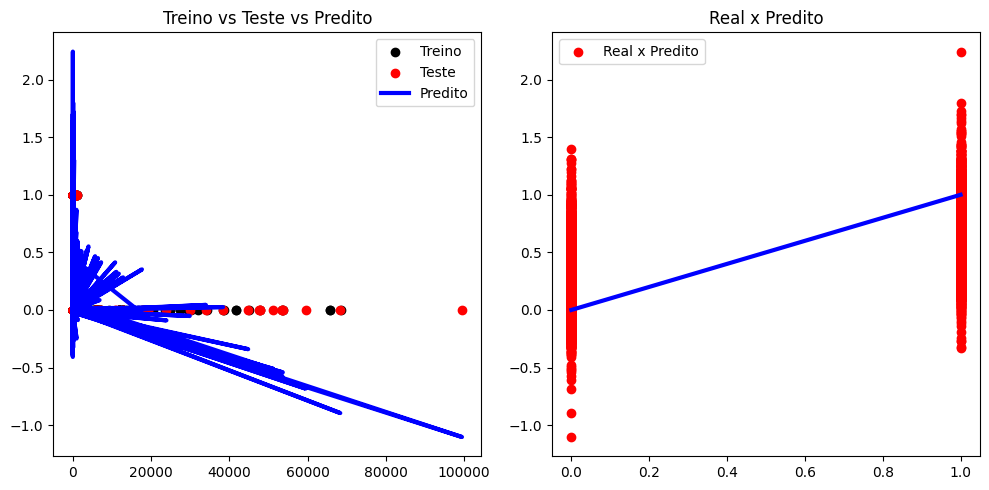

In [ ]:
# Выбираем пятый столбец (индекс 4) для построения графиков
X_train_col = X_train.iloc[:, 0]  # выбираем пятый столбец из X_train
X_test_col = X_test.iloc[:, 0]    # выбираем пятый столбец из X_test

# Построение графиков
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Первая диаграмма: Обучающие и тестовые данные
ax[0].scatter(X_train_col, y_train, color="black", label='Treino')
ax[0].scatter(X_test_col, y_test, color="red", label='Teste')
ax[0].plot(X_test_col, y_pred, color="blue", linewidth=3, label='Predito')

ax[0].set_title('Treino vs Teste vs Predito')
ax[0].legend()

# Вторая диаграмма: Реальные значения против предсказанных
ax[1].scatter(y_test, y_pred, color="red", label='Real x Predito')
ax[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="blue", linewidth=3)

ax[1].set_title('Real x Predito')
ax[1].legend()

plt.tight_layout()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Предсказания модели
#y_pred = model.predict(X_test)

# Вывод коэффициентов
print("Coeficientes: ", regr.intercept_, regr.coef_)

# Вычисление ошибки
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# Коэффициент детерминации (R^2)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coeficientes:  0.041441967544685446 [-1.33064994e-05 -4.54141019e-08 -3.11533937e-03  1.68459752e-03
 -1.15714421e-09 -1.13967328e-09  1.73007872e-03  1.78849010e-01
 -2.32160089e-02 -1.10558519e-01 -2.72807898e-01  2.70011825e-01
 -1.58206781e-14  5.27355937e-16 -3.96730755e-02  9.98278476e-03
 -3.28211644e-02 -2.88026785e-04  1.54379557e-04 -5.95302517e-03
  5.25194717e-02  1.80723414e-01 -2.87964097e-16 -2.00360561e-16
 -3.51077290e-01 -4.16333634e-17 -6.47723068e-02 -3.26170348e-02
 -5.17559087e-04 -1.59282302e-02 -7.87229399e-02 -4.62833322e-02
 -4.62833322e-02 -1.39197527e-05 -3.04648221e-04  2.30043812e-04
 -4.04214026e-05  1.13824539e-03  3.17149985e-05  4.22830381e-11
 -6.59956574e-03  7.01813295e-03 -1.35962443e-03  2.08237379e-08
  1.24263965e-01  1.69916604e-04]
Mean squared error: 0.01
Coefficient of determination: 0.56
